# General function to convert our mat files to python npz files

In [2]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [3]:
# specify file to convert. 
mat_data = sio.loadmat("s03_data.mat")
out_file = "s03_data.npz"

# make a copy to modify fields...note: for really big files this
# might not be a great idea...
new_dict = mat_data.copy()

# loop over keys/values
for k,v in mat_data.items():
    
    # ditch the first few header fields
    if k.startswith("__"):
        print('Ditching', k)
        new_dict.pop(k)
        continue
    
    else:
        print('Keeping', k, 'with size', v.shape)
        
        # remove (squeeze) any singleton dims
        if 1 in v.shape:
            print('Squeezing array', k)
            new_dict[k] = np.squeeze(v)
        
print(new_dict.keys())

# export as npz using the kwargs operator
np.savez(out_file, **new_dict)

Ditching __header__
Ditching __version__
Ditching __globals__
Keeping myOrL with size (288, 1)
Squeezing array myOrL
Keeping myOrR with size (288, 1)
Squeezing array myOrR
Keeping myAttnSide with size (288, 1)
Squeezing array myAttnSide
Keeping myLbetas with size (288, 209)
Keeping myRbetas with size (288, 220)
dict_keys(['myOrL', 'myOrR', 'myAttnSide', 'myLbetas', 'myRbetas'])


['myOrL', 'myOrR', 'myAttnSide', 'myLbetas', 'myRbetas']


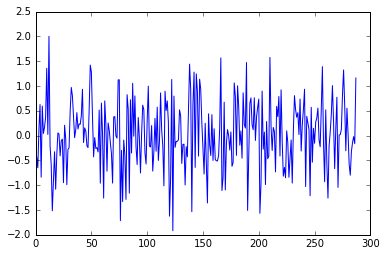

In [34]:
test = np.load(out_file)
print(test.keys())

# plot out a timecourse from one voxel...
plt.plot(test['myRbetas'][:,1])
plt.show()